# Automated Web Data Extraction Project

**Importing Required Libraries**

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import logging
import matplotlib.pyplot as plt

**Set up logging**

In [21]:
logging.basicConfig(level=logging.INFO)
logging.info("Starting the web scraping process...")

INFO:root:Starting the web scraping process...


In [22]:
url = "http://quotes.toscrape.com/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
}

In [23]:
try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()  
    soup = BeautifulSoup(response.text, "html.parser")
except requests.exceptions.RequestException as e:
    logging.error(f"Request failed: {e}")


In [24]:
try:
    response = requests.get(url, headers=headers)
    response.raise_for_status() 
    soup = BeautifulSoup(response.text, "html.parser")
except requests.exceptions.RequestException as e:
    logging.error(f"Request failed: {e}")

In [25]:
page = 1
data = []

while True:
    try:
        next_page = soup.find("li", class_="next")
        if next_page:
            logging.info(f"Scraping page {page}...")
            url = f"http://quotes.toscrape.com/page/{page}/"
            response = requests.get(url, headers=headers)
            soup = BeautifulSoup(response.text, "html.parser")
            
            # Extract data from this page
            quotes = soup.find_all("span", class_="text")
            authors = soup.find_all("small", class_="author")
            tags = soup.find_all("div", class_="tags")
            
            for i in range(len(quotes)):
                data.append({
                    "quote": quotes[i].text,
                    "author": authors[i].text,
                    "tags": [tag.text for tag in tags[i].find_all("a", class_="tag")]
                })
            
            # Rate limiting: delay between requests
            time.sleep(2)
            
            # Move to the next page
            page += 1
        else:
            logging.info("No more pages to scrape.")
            break
    except requests.exceptions.RequestException as e:
        logging.error(f"Request failed on page {page}: {e}")
        break


INFO:root:Scraping page 1...
INFO:root:Scraping page 2...
INFO:root:Scraping page 3...
INFO:root:Scraping page 4...
INFO:root:Scraping page 5...
INFO:root:Scraping page 6...
INFO:root:Scraping page 7...
INFO:root:Scraping page 8...
INFO:root:Scraping page 9...
INFO:root:Scraping page 10...
INFO:root:No more pages to scrape.


In [26]:
df = pd.DataFrame(data)
df.dropna(inplace=True)  
df['quote'] = df['quote'].str.strip()  # Remove any leading/trailing whitespace

In [27]:
df.to_csv("scraped_quotes.csv", index=False)
logging.info("Data has been saved to 'scraped_quotes.csv'.")

INFO:root:Data has been saved to 'scraped_quotes.csv'.


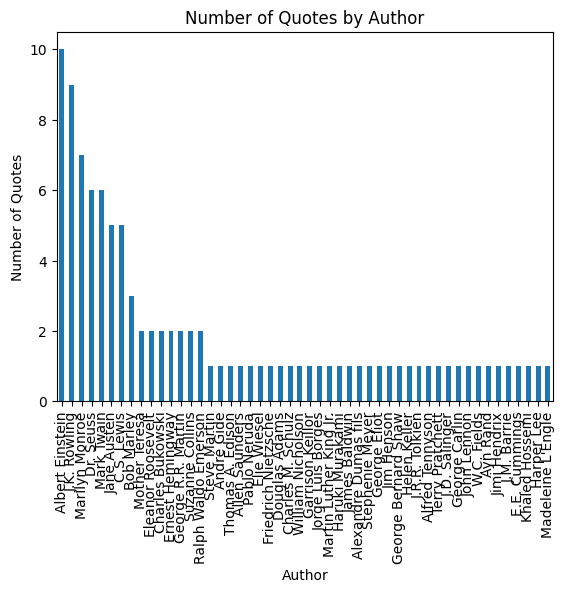

In [28]:
df['author'].value_counts().plot(kind='bar')
plt.title("Number of Quotes by Author")
plt.xlabel("Author")
plt.ylabel("Number of Quotes")
plt.show()
